In [ ]:
import pandas as pd
import numpy as np
import fasttext
import ast # Library untuk mengubah string "['a','b']" menjadi list ['a','b']

# ---------------------------------------------------------
# 1. LOAD DATA & MODEL
# ---------------------------------------------------------
file_path = "hasil_preprocessing.csv"
model_path = "cc.id.300.bin" # Pastikan file ini ada (ukurannya besar ~4GB-7GB)

print("Loading Data...")
data = pd.read_csv(file_path)

print("Loading FastText Model (ini mungkin memakan waktu)...")
# Menggunakan library resmi fasttext
ft = fasttext.load_model(model_path)

# ---------------------------------------------------------
# 2. PARSING DATA (PENTING!)
# ---------------------------------------------------------
# Data di CSV biasanya terbaca sebagai string: "['kata1', 'kata2']"
# Kita ubah menjadi list python asli: ['kata1', 'kata2']
print("Parsing kolom list...")
try:
    # Coba convert jika tipe datanya masih string
    if isinstance(data['StopwordRemoval'].iloc[0], str):
        data['StopwordRemoval'] = data['StopwordRemoval'].apply(ast.literal_eval)
except ValueError:
    print("Data mungkin sudah dalam bentuk list atau format error.")

# ---------------------------------------------------------
# 3. VEKTORISASI (MEAN POOLING)
# ---------------------------------------------------------
def get_vector(token_list):
    """
    Mengubah list kata menjadi satu vektor (rata-rata dari vektor kata-katanya)
    """
    if not token_list: # Handle jika list kosong
        return np.zeros(300) # Sesuaikan dimensi (300 untuk cc.id.300.bin)
    
    word_vectors = []
    for word in token_list:
        # ft.get_word_vector akan mengembalikan vektor untuk kata tersebut
        # Jika kata tidak ada (OOV), fasttext akan menggenerate vektor dari n-grams
        vec = ft.get_word_vector(word)
        word_vectors.append(vec)
    
    # Rata-rata semua vektor kata dalam satu review
    return np.mean(word_vectors, axis=0)

Loading Data...
Loading FastText Model (ini mungkin memakan waktu)...
Parsing kolom list...


   Melakukan Vektorisasi Data (Mean Pooling)...
   Shape Vektor Akhir: (7881, 300)
3. Mulai Iterasi K-Means (Mencari K Optimal)...
   k=2 -> Silhouette Score: 0.1723
   k=3 -> Silhouette Score: 0.0844
   k=4 -> Silhouette Score: 0.0783
   k=5 -> Silhouette Score: 0.0869
   k=6 -> Silhouette Score: 0.0569
   k=7 -> Silhouette Score: 0.0405
   k=8 -> Silhouette Score: 0.0324
   k=9 -> Silhouette Score: 0.0363
   k=10 -> Silhouette Score: 0.0351


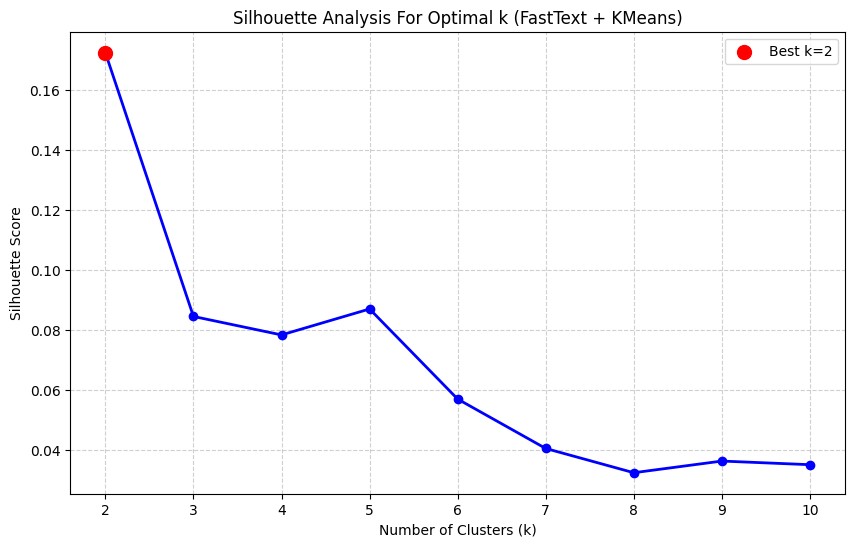


✅ Rekomendasi Jumlah Topik (k): 2 (Score: 0.1723)


In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print("   Melakukan Vektorisasi Data (Mean Pooling)...")
# Buat list of vectors lalu ubah ke Numpy Array
vectors = np.array([get_vector(tokens) for tokens in data['StopwordRemoval']])

print(f"   Shape Vektor Akhir: {vectors.shape}")

# ==========================================
# 3. LOOPING SILHOUETTE SCORE
# ==========================================
silhouette_scores = []
K_range = range(2, 11) # Mencoba dari 2 sampai 10 cluster

print("3. Mulai Iterasi K-Means (Mencari K Optimal)...")

for k in K_range:
    # n_init=10: Menjalankan k-means 10x dengan centroid awal berbeda agar hasil stabil
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(vectors)
    
    # Hitung score
    score = silhouette_score(vectors, labels)
    silhouette_scores.append(score)
    
    print(f"   k={k} -> Silhouette Score: {score:.4f}")

# ==========================================
# 4. VISUALISASI HASIL
# ==========================================
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='b', linewidth=2)

# Menandai titik tertinggi
best_idx = np.argmax(silhouette_scores)
best_k = K_range[best_idx]
best_score = silhouette_scores[best_idx]

plt.scatter(best_k, best_score, color='red', s=100, zorder=5, label=f'Best k={best_k}')
plt.title('Silhouette Analysis For Optimal k (FastText + KMeans)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print(f"\n✅ Rekomendasi Jumlah Topik (k): {best_k} (Score: {best_score:.4f})")

In [5]:
import pandas as pd
import numpy as np
import fasttext
import ast # Library untuk mengubah string "['a','b']" menjadi list ['a','b']
from sklearn.cluster import KMeans

# ---------------------------------------------------------
# 1. LOAD DATA & MODEL
# ---------------------------------------------------------
file_path = "hasil_preprocessing.csv"
model_path = "cc.id.300.bin" # Pastikan file ini ada (ukurannya besar ~4GB-7GB)

print("Loading Data...")
data = pd.read_csv(file_path)

print("Loading FastText Model (ini mungkin memakan waktu)...")
# Menggunakan library resmi fasttext
ft = fasttext.load_model(model_path)

# ---------------------------------------------------------
# 2. PARSING DATA (PENTING!)
# ---------------------------------------------------------
# Data di CSV biasanya terbaca sebagai string: "['kata1', 'kata2']"
# Kita ubah menjadi list python asli: ['kata1', 'kata2']
print("Parsing kolom list...")
try:
    # Coba convert jika tipe datanya masih string
    if isinstance(data['StopwordRemoval'].iloc[0], str):
        data['StopwordRemoval'] = data['StopwordRemoval'].apply(ast.literal_eval)
except ValueError:
    print("Data mungkin sudah dalam bentuk list atau format error.")

# ---------------------------------------------------------
# 3. VEKTORISASI (MEAN POOLING)
# ---------------------------------------------------------
def get_vector(token_list):
    """
    Mengubah list kata menjadi satu vektor (rata-rata dari vektor kata-katanya)
    """
    if not token_list: # Handle jika list kosong
        return np.zeros(300) # Sesuaikan dimensi (300 untuk cc.id.300.bin)
    
    word_vectors = []
    for word in token_list:
        # ft.get_word_vector akan mengembalikan vektor untuk kata tersebut
        # Jika kata tidak ada (OOV), fasttext akan menggenerate vektor dari n-grams
        vec = ft.get_word_vector(word)
        word_vectors.append(vec)
    
    # Rata-rata semua vektor kata dalam satu review
    return np.mean(word_vectors, axis=0)

print("Sedang melakukan vektorisasi...")
# Terapkan fungsi ke setiap baris data
vector_list = data['StopwordRemoval'].apply(get_vector).tolist()

# Ubah menjadi array numpy agar bisa masuk ke Sklearn
X = np.array(vector_list)

Loading Data...
Loading FastText Model (ini mungkin memakan waktu)...


Parsing kolom list...
Sedang melakukan vektorisasi...


Mulai mencari Coherence Score...
Num Clusters: 2 - Coherence Score: 0.5655
Num Clusters: 3 - Coherence Score: 0.5279
Num Clusters: 4 - Coherence Score: 0.4893
Num Clusters: 5 - Coherence Score: 0.5038
Num Clusters: 6 - Coherence Score: 0.4833
Num Clusters: 7 - Coherence Score: 0.5075
Num Clusters: 8 - Coherence Score: 0.4971
Num Clusters: 9 - Coherence Score: 0.5213
Num Clusters: 10 - Coherence Score: 0.5274
Num Clusters: 11 - Coherence Score: 0.5430
Num Clusters: 12 - Coherence Score: 0.5391
Num Clusters: 13 - Coherence Score: 0.5185
Num Clusters: 14 - Coherence Score: 0.5324
Num Clusters: 15 - Coherence Score: 0.5293
Num Clusters: 16 - Coherence Score: 0.5281
Num Clusters: 17 - Coherence Score: 0.5234
Num Clusters: 18 - Coherence Score: 0.5055
Num Clusters: 19 - Coherence Score: 0.5194


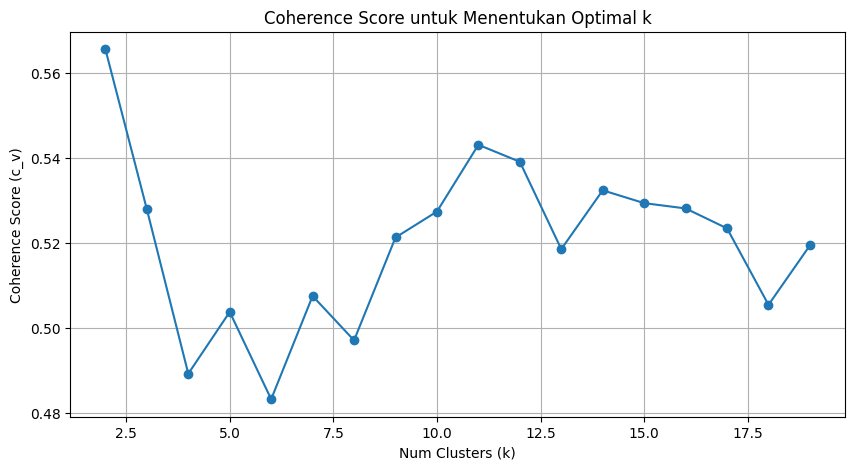


Nilai k terbaik berdasarkan Coherence Score tertinggi adalah: 2


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
import gensim
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

# Asumsi variabel 'X' (vektor dari FastText) dan 'data' sudah ada dari kode sebelumnya

# ---------------------------------------------------------
# 1. PERSIAPAN GENSIM (Kamus Data)
# ---------------------------------------------------------
# Data teks harus dalam bentuk list of list token
texts = data['StopwordRemoval'].tolist()

# Buat Dictionary Gensim (Peta kata -> ID)
dictionary = Dictionary(texts)

# Filter kata yang terlalu jarang/umum (Opsional, untuk akurasi score)
dictionary.filter_extremes(no_below=2, no_above=0.9)

# Corpus (Bag of Words) - dibutuhkan CoherenceModel
corpus = [dictionary.doc2bow(text) for text in texts]

# ---------------------------------------------------------
# 2. FUNGSI EKSTRAKSI TOPIK DARI K-MEANS
# ---------------------------------------------------------
def get_kmeans_topics(kmeans_labels, texts, n_top_words=10):
    """
    Mengubah hasil cluster K-Means menjadi list of topics (kata-kata kunci)
    """
    topics = []
    n_clusters = len(set(kmeans_labels))
    
    # Gabungkan teks berdasarkan label cluster
    df_temp = pd.DataFrame({'text': texts, 'label': kmeans_labels})
    
    for i in range(n_clusters):
        # Ambil semua kata dari dokumen di cluster i
        cluster_docs = df_temp[df_temp['label'] == i]['text']
        all_words = [word for doc in cluster_docs for word in doc]
        
        # Hitung frekuensi kata
        word_counts = Counter(all_words)
        
        # Ambil n kata teratas sebagai representasi topik
        top_words = [word for word, count in word_counts.most_common(n_top_words)]
        topics.append(top_words)
        
    return topics

# ---------------------------------------------------------
# 3. LOOPING MENCARI N TERBAIK (COHERENCE SCORE)
# ---------------------------------------------------------
limit = 20      # Maksimal cluster yang dicoba
start = 2       # Mulai dari 2 cluster
step = 1
coherence_scores = []
model_list = []

print("Mulai mencari Coherence Score...")

for k in range(start, limit, step):
    # a. Jalankan K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X) # X adalah vektor hasil FastText
    
    # b. Ekstraksi Kata Kunci per Cluster
    # Kita butuh ini karena CoherenceModel menilai kualitas KATA, bukan VEKTOR
    topics = get_kmeans_topics(kmeans.labels_, texts, n_top_words=10)
    
    # c. Hitung Coherence Score (c_v)
    cm = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    score = cm.get_coherence()
    
    coherence_scores.append(score)
    print(f"Num Clusters: {k} - Coherence Score: {score:.4f}")

# ---------------------------------------------------------
# 4. VISUALISASI GRAFIK
# ---------------------------------------------------------
x = range(start, limit, step)
plt.figure(figsize=(10, 5))
plt.plot(x, coherence_scores, marker='o')
plt.xlabel("Num Clusters (k)")
plt.ylabel("Coherence Score (c_v)")
plt.title("Coherence Score untuk Menentukan Optimal k")
plt.grid(True)
plt.show()

# Cetak nilai tertinggi
best_k = x[np.argmax(coherence_scores)]
print(f"\nNilai k terbaik berdasarkan Coherence Score tertinggi adalah: {best_k}")

In [1]:
import ast
import fasttext
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# --- 2️⃣ Load Dataset ---
file_path = "hasil_preprocessing.csv"  # ganti sesuai lokasi file
data = pd.read_csv(file_path)

In [ ]:
model_path = "cc.id.300.bin" 
ft = fasttext.load_model(model_path)
print("✅ FastText model loaded successfully!")


Contoh data token:
0    [admin, harap, update, aplikasi, mode, landsca...
1    [lawan, pengalaman, interface, fitur, komplit,...
2    [kelebihan, chat, suport, cepat, dilayani, per...
3    [charting, pinjam, tradingview, indikator, par...
4    [oke, banget, fitur, suka, trading, cepat, mak...
Name: tokens, dtype: object
✅ FastText model loaded successfully!


In [19]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
from collections import Counter
from sklearn.preprocessing import StandardScaler

texts = data['StopwordRemoval'].apply(eval)

# === 2. Kumpulkan semua kata unik ===
all_words = [word for tokens in texts for word in tokens if word.strip() != '']
word_freq = Counter(all_words)

# (Opsional) Ambil kata yang cukup sering muncul biar cluster nggak noise
filtered_words = [w for w, c in word_freq.items() if c >= 3]  # ambil kata yang muncul minimal 3x

print(f"Jumlah kata unik sebelum filter: {len(all_words)}")
print(f"Jumlah kata unik sesudah filter: {len(filtered_words)}")

# model_path = "cc.id.300.bin"  # pastikan sudah ada di direktori kerja
# ft = fasttext.load_model(model_path)
# print("✅ FastText model loaded successfully!")

# === 3. Dapatkan FastText embedding untuk setiap kata ===
word_vectors = np.array([ft.get_word_vector(w) for w in filtered_words])

# === 4. Normalisasi vektor ===
X_norm = StandardScaler().fit_transform(word_vectors)

# === 5. Reduksi dimensi untuk stabilitas clustering ===
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_norm)

Jumlah kata unik sebelum filter: 58304
Jumlah kata unik sesudah filter: 2040


K=2, Coherence=0.3189
K=3, Coherence=0.3504
K=4, Coherence=0.3919
K=5, Coherence=0.4222
K=6, Coherence=0.4507
K=7, Coherence=0.4595
K=8, Coherence=0.5134
K=9, Coherence=0.5321
K=10, Coherence=0.5490
K=11, Coherence=0.5496
K=12, Coherence=0.5517
K=13, Coherence=0.5896
K=14, Coherence=0.5842
K=15, Coherence=0.5813


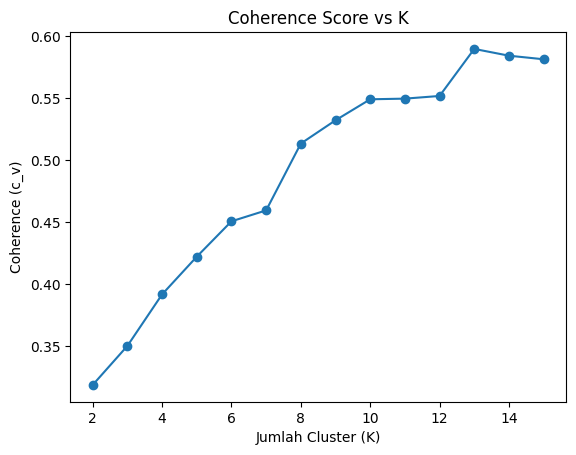

In [21]:
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(texts)
coherence_scores = []

for K in range(2, 16):
    kmeans = KMeans(
    n_clusters=K,
    init="k-means++",
    n_init="auto",
    max_iter=500,
    tol=1e-4,
    random_state=42
)
    labels = kmeans.fit_predict(X_pca)
    
    clusters = [[] for _ in range(K)]
    for word, label in zip(filtered_words, labels):
        clusters[label].append(word)
    
    cm = CoherenceModel(
        topics=clusters,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence = cm.get_coherence()
    coherence_scores.append(coherence)
    print(f"K={K}, Coherence={coherence:.4f}")

# (Opsional) Plot grafik
import matplotlib.pyplot as plt
plt.plot(range(2, 16), coherence_scores, marker='o')
plt.title("Coherence Score vs K")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Coherence (c_v)")
plt.show()


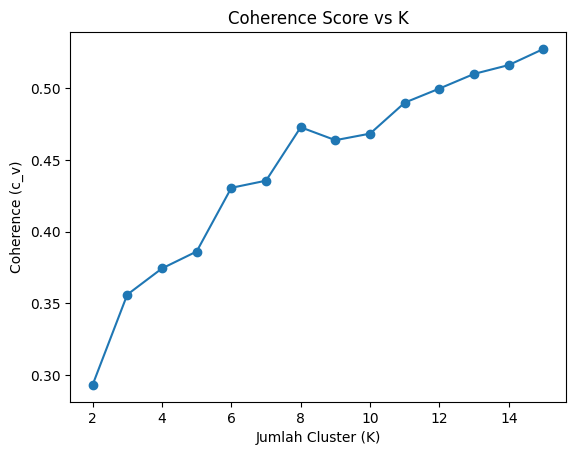

In [11]:
# (Opsional) Plot grafik
import matplotlib.pyplot as plt
plt.plot(range(2, 16), coherence_scores, marker='o')
plt.title("Coherence Score vs K")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Coherence (c_v)")
plt.show()